#### Introdução ao Scikit-Learn (sklearn)

Scikit-Learn é uma biblioteca poderosa para Machine Learning em Python. Ela fornece ferramentas para tarefas como classificação, regressão, clusterização, redução de dimensionalidade, validação cruzada, e muito mais.

Neste módulo, exploraremos as funcionalidades principais do Scikit-Learn de forma prática.
Conteúdo

- Pré-processamento de Dados
- Regressão Linear
- Classificação com K-Nearest Neighbors (KNN)
- Árvores de Decisão
- Validação Cruzada
- Pipeline de Machine Learning
- Clusterização com K-Means

---


#### 1. Pré-processamento de Dados

O pré-processamento é essencial para normalizar, padronizar ou transformar os dados antes de aplicá-los a algoritmos de aprendizado.

In [1]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np

# Dados de exemplo
data = np.array([[1.0, 2.0, 3.0],
                 [4.0, 5.0, 6.0],
                 [7.0, 8.0, 9.0]])

# Padronização (média=0, desvio padrão=1)
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data)

# Normalização (escala entre 0 e 1)
minmax_scaler = MinMaxScaler()
data_normalized = minmax_scaler.fit_transform(data)

print("Dados Padronizados:\n", data_standardized)
print("\nDados Normalizados:\n", data_normalized)


Dados Padronizados:
 [[-1.22474487 -1.22474487 -1.22474487]
 [ 0.          0.          0.        ]
 [ 1.22474487  1.22474487  1.22474487]]

Dados Normalizados:
 [[0.  0.  0. ]
 [0.5 0.5 0.5]
 [1.  1.  1. ]]


#### 2. Regressão Linear

A regressão linear é usada para prever valores contínuos. Vamos usar o conjunto de dados `diabetes` para exemplo.

In [2]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Carregar o conjunto de dados
data = load_diabetes()
X = data.data
y = data.target

# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliação do modelo
mse = mean_squared_error(y_test, y_pred)
print(f"Erro Quadrático Médio: {mse:.2f}")

Erro Quadrático Médio: 2900.19


#### 3. Classificação com K-Nearest Neighbors (KNN)

O KNN é usado para tarefas de classificação com base na proximidade de amostras.

In [3]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Carregar dados de exemplo (Iris)
data = load_iris()
X = data.data
y = data.target

# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Fazer previsões
y_pred = knn.predict(X_test)

# Avaliação do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy:.2f}")


Acurácia: 1.00


#### 4. Árvores de Decisão

As Árvores de Decisão são modelos interpretáveis usados para classificação ou regressão.


In [4]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Criar e treinar o modelo
tree = DecisionTreeClassifier(max_depth=3, random_state=42)
tree.fit(X_train, y_train)

# Fazer previsões
y_pred = tree.predict(X_test)

# Relatório de Classificação
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



#### 5. Validação Cruzada

A validação cruzada avalia o desempenho do modelo em diferentes divisões do conjunto de dados.


In [5]:
from sklearn.model_selection import cross_val_score

# Avaliação com validação cruzada
scores = cross_val_score(knn, X, y, cv=5)
print(f"Acurácia Média (KNN): {np.mean(scores):.2f}")

Acurácia Média (KNN): 0.97


#### 6. Pipeline de Machine Learning

Os pipelines automatizam o fluxo de trabalho, combinando pré-processamento e aprendizado.



In [6]:

from sklearn.pipeline import Pipeline

# Criar pipeline com normalização e KNN
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=3))
])

# Treinar e avaliar o pipeline
pipeline.fit(X_train, y_train)
accuracy = pipeline.score(X_test, y_test)
print(f"Acurácia do Pipeline: {accuracy:.2f}")


Acurácia do Pipeline: 1.00


#### 7. Clusterização com K-Means

O K-Means é usado para agrupar dados não rotulados em clusters.



/home/est.pedrolucca/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


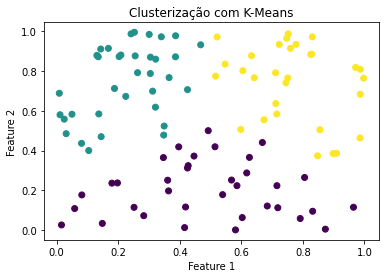

In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Dados de exemplo
data = np.random.rand(100, 2)

# Agrupamento em 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data)
labels = kmeans.labels_

# Visualizar clusters
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
plt.title('Clusterização com K-Means')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
